In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [2]:
def pps(m,ND) :
    P=n*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"⬜️"
    print(b,end="")
    print(c, end="")
    if n==ND:
        print("\r","computing successfully completed!   ",50*"🟦")

In [3]:
def initial_condition(I0):
    G=nx.read_gpickle('Graph.gpickle')
    for n_0 in G.nodes:
        G.nodes[n_0]['x']=['s']
        G.nodes[n_0]['tpe']=[0]
        if random.random()<I0:
            G.nodes[n_0]['x']=['i']
    return G

In [4]:
def Count_nodes(Graph):
    enode=[]
    rnode=[]
    inode=[]

    for n_1 in Graph.nodes:
        if Graph.nodes[n_1]['x']==['r']:
            rnode.append(n_1)
        if Graph.nodes[n_1]['x']==['e']:
            enode.append(n_1)  
        if Graph.nodes[n_1]['x']==['i']:
            inode.append(n_1)  

    return (inode,enode,len(rnode))

In [5]:
def SEIR_dynamic(I0,beta,gamma,t_e,P1):

    G = initial_condition(I0)
    rdata=[]

    while len(rdata)<20 or rdata[-1]!=rdata[-3]:

        (inode,enode,rnum)= Count_nodes(Graph=G)
        rdata.append(rnum)

        for n_2 in G.nodes:
            if G.nodes[n_2]['x']==['s'] and random.random()<P1:
                G.nodes[n_2]['x']=['v']
            if G.nodes[n_2]['x']==['e']:
                G.nodes[n_2]['tpe'][0]+=1
        for n_3 in range(len(enode)):
            if G.nodes[enode[n_3]]['tpe']>=np.random.poisson(t_e,size=1)[0]:
                G.nodes[enode[n_3]]['x']=['i']

        for n_6 in range(len(inode)):
            if random.random()<gamma:
                G.nodes[inode[n_6]]['x']=['r']
            for n_7 in range(len(list(G.adj[inode[n_6]]))):
                if ((G.nodes[list(G.adj[inode[n_6]])[n_7]]['x']==['s']) and (random.random()<beta)):
                    G.nodes[list(G.adj[inode[n_6]])[n_7]]['x']=['e']

    rnum=0
    for i in G.nodes:
        if G.nodes[i]['x']==['r']:
            rnum+=1
    return rnum

In [6]:
a=time.time()
data=SEIR_dynamic(I0= 0.01,beta= 0.5,gamma= 1,t_e= 5,P1= 0.05)
b=time.time()
b-a

0.08999752998352051

In [7]:
data

100

In [8]:
P1_list= [0,0.025,0.05,0.075,0.1]
rdata= np.zeros((5,50,100))
rmean= np.zeros((5,50))
beta_list=np.linspace(0,1,50)
n=0
for p in P1_list:
    m=0
    for b in beta_list:
        for i in range(100):
            rdata[n][m][i]=SEIR_dynamic(I0= 0.01,beta= b,gamma= 1,t_e= 5,P1= p)
        rmean[n][m]=np.mean(rdata[n][m])
        m+=1
    n+=1
    pps(n,5)

 computing successfully completed!    🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦


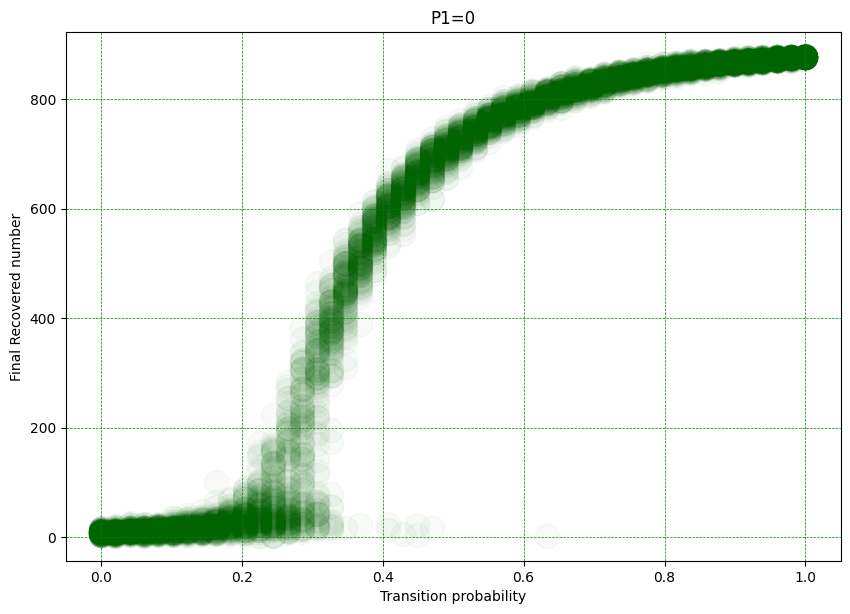

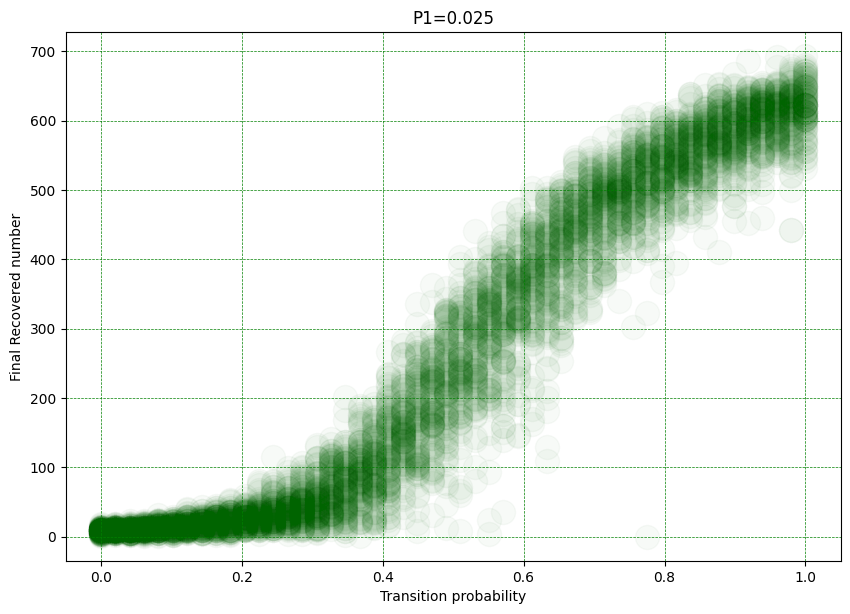

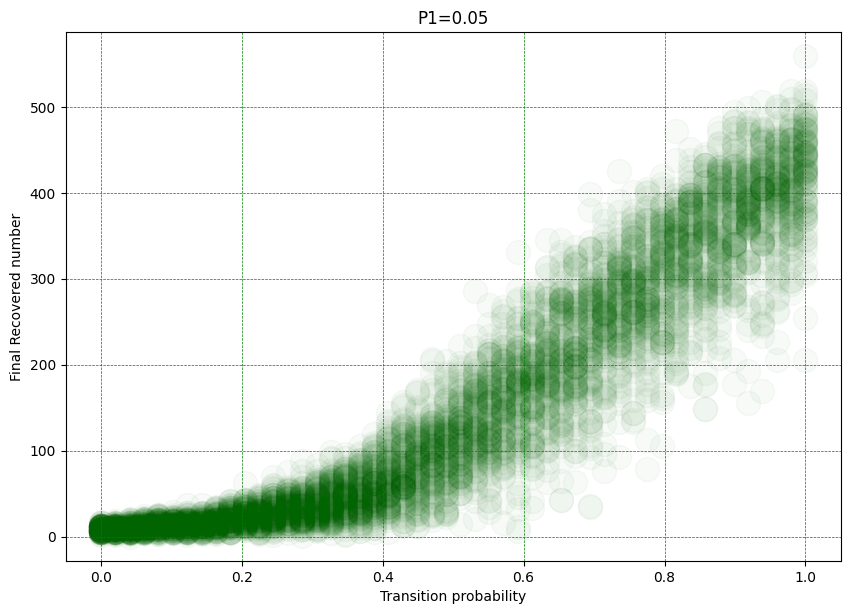

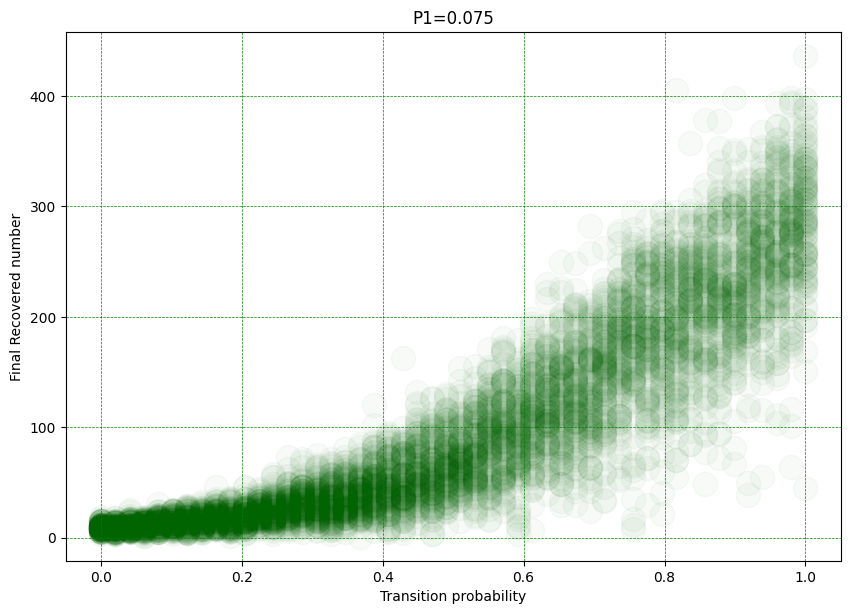

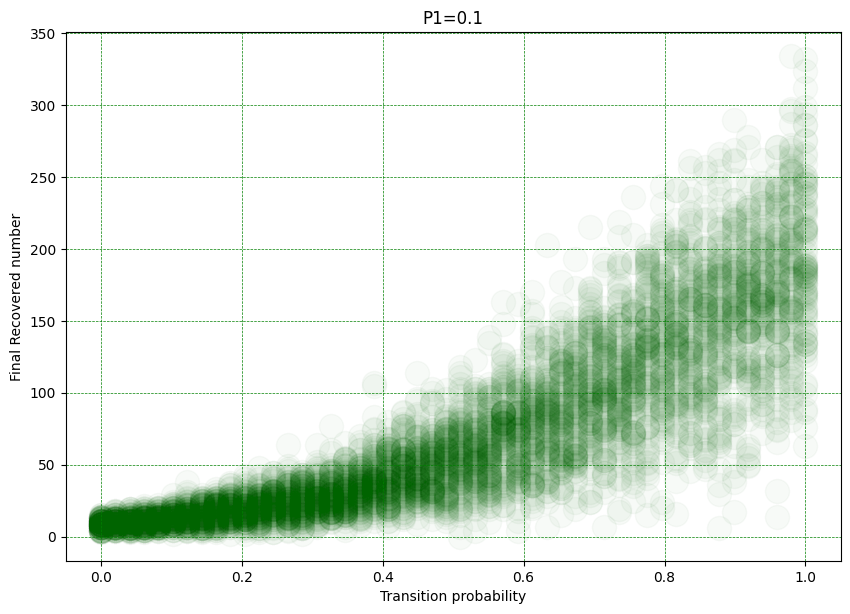

In [9]:
for m in range(5):
    plt.figure(figsize=(10,7),dpi=100)
    plt.grid(color = 'g', linestyle = '--', linewidth = 0.5)
    plt.title('P1={}'.format(P1_list[m]))
    for i in range(50):
        plt.scatter(np.full(100,beta_list[i]),rdata[m][i],s=300,c='darkgreen',alpha=0.03)
    plt.xlabel('Transition probability')
    plt.ylabel('Final Recovered number')
    plt.savefig('fig1({})'.format(m))
    plt.show()

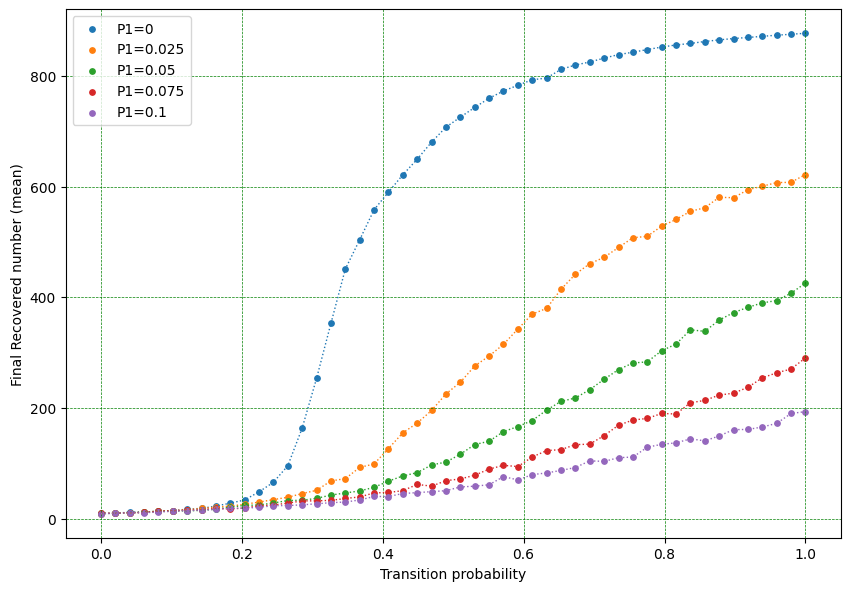

In [10]:
plt.figure(figsize=(10,7),dpi=100)
plt.grid(color = 'g', linestyle = '--', linewidth = 0.5)
plt.xlabel('Transition probability')
plt.ylabel('Final Recovered number (mean)')
for i in range(5):
    plt.plot(beta_list,rmean[i],lw=1,linestyle=':')
    plt.scatter(beta_list,rmean[i],s=15,label='P1={}'.format(P1_list[i]))
plt.legend(loc=0)
plt.savefig('fig12')
plt.show()

In [11]:
np.save('1-1-(50-100).npy',rdata)